#  Seleccione un conjunto de textos, pueden ser noticias, reviews, tweets, etc.
* Cargue los datos con pandas y genere tres diferentes wordclouds, con diferentes configuraciones, por ejemplo: diferentes stopwords, escalas, tamaños, etc.

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [4]:
texo= pd.read_table("poemaBu.txt", encoding="UTF-8", skip_blank_lines=True, header=None)
texo


,0
0,Los Olvidados.
1,Jacque Prevet.
2,La última vez que vi
3,a Luis Buñuel
4,era en Nueva York
...,...
102,en plena miseria en la ciudad de México
103,y todos esos niños
104,que morían atrozmente en la pantalla
105,estaban más vivos


In [5]:
#limpiamos el texto

texto=" ".join(texo[0])
texto=texto.replace(".","")
texto=texto.replace(",","")
texto=texto.replace("-","")
texto=texto.replace("“","")
texto=texto.replace("”","")
texto=texto.replace("(","")
texto=texto.replace(")","")
texto=texto.replace(":","")

lispal=texto.split(" ")
print(lispal)

['Los', 'Olvidados', 'Jacque', 'Prevet', 'La', 'última', 'vez', 'que', 'vi', 'a', 'Luis', 'Buñuel', 'era', 'en', 'Nueva', 'York', 'en', '1938', 'y', 'en', 'Norteamérica', 'Lo', 'volví', 'a', 'ver', 'anteayer', 'en', 'Cannes', 'de', 'lejos', 'y', 'de', 'cerca', 'No', 'ha', 'cambiado', 'nada', 'Luis', 'Buñuel', 'no', 'es', 'un', 'exhibidor', 'de', 'sombras', 'de', 'sombras', 'ensotanadas', 'de', 'sombras', 'consolantes', 'consoladas', 'y', 'confortablemente', 'martirizadas', 'y', 'como', 'hace', 'años', 'la', 'matanza', 'de', 'los', 'inocentes', 'le', 'hiere', 'y', 'le', 'subleva', 'lúcidamente', 'generosamente', 'sin', 'que', 'sienta', 'para', 'nada', 'en', 'el', 'mundo', 'la', 'necesidad', 'de', 'un', 'chivo', 'expiatorio', 'clavado', 'en', 'la', 'cruz', 'para', 'legitimarla', '—esa', 'matanza—', 'Luis', 'Buñuel', 'no', 'es', 'un', 'exhibidor', 'de', 'sombras', 'más', 'bien', 'un', 'exhibidor', 'de', 'soles', 'pero', 'aun', 'cuando', 'esos', 'soles', 'sean', 'sangrientos', 'los', 'mues

In [8]:
# definimos las stopwords en español 
quitar = ["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora",
"ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos",
"antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello",
"aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así",
"atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno",
"buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con",
"conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues",
"contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro",
"cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de",
"debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde",
"despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes",
"dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos",
"embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces",
"entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban","estado",
"estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex",
"excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general",
"gran","grandes","gueno","h","ha","haber","habia","habla","hablan","habrá","había","habían","hace","haceis","hacemos",
"hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos","hicieron",
"hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan",
"intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva",
"llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó",
"menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha",
"muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno",
"ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo",
"nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada",
"pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais",
"podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera",
"primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo",
"pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas",
"quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe",
"sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según","seis","ser",
"sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre",
"sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo",
"sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendrá","tendrán","teneis",
"tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda","todas","todavia",
"todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras",
"trata","través","tres","tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos",
"usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios",
"vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro",
"vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas",
"último","últimos", "Lo"]


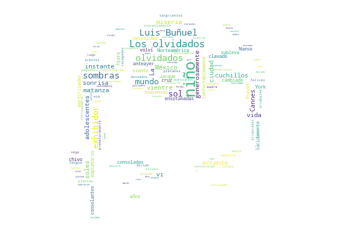

In [41]:
#Primer wordcloud
from PIL import Image
import PIL.Image
import numpy as np

nuevotex=[]
for pal in lispal:
    if not pal in quitar:
        nuevotex.append(pal)
custom_mask=np.array(PIL.Image.open("luis_bu.jpeg"))
wordcloud = WordCloud(width=10000,height=10000, background_color="white", mask=custom_mask).generate(" ".join(nuevotex))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("nubeBCa.png")
plt.show()


In [12]:
#quito las mayousculas
texto=texto.lower()
lispal=texto.split(" ")
print(lispal)

['voto', 'electrónico', 'opción', 'a', 'analizar', 'para', 'reforma', 'electoral', 'amlo', 'tras', 'destacar', 'la', 'experiencia', 'brasileña', 'para', 'difundir', 'con', 'agilidad', 'los', 'resultados', 'a', 'partir', 'del', 'uso', 'del', 'voto', 'electrónico', 'el', 'presidente', 'andrés', 'manuel', 'lópez', 'obrador', 'se', 'pronunció', 'porque', 'en', 'el', 'marco', 'de', 'la', 'reforma', 'electoral', 'se', 'analice', 'esta', 'opción', 'para', 'darle', 'mayor', 'confianza', 'y', 'rapidez', 'a', 'los', 'resultados', 'electorales', 'durante', 'su', 'conferencia', 'conminó', 'a', 'los', 'legisladores', 'a', 'que', 'una', 'comisión', 'acuda', 'a', 'brasil', 'para', 'que', 'conozcan', 'a', 'fondo', 'su', 'funcionamiento', 'aprovechó', 'para', 'señalar', 'que', 'el', 'pueblo', 'brasileño', 'está', 'muy', 'consciente', 'les', 'va', 'a', 'ir', 'muy', 'bien', 'va', 'a', 'haber', 'igualdad', 'humanismo', 'estoy', 'muy', 'contento', 'porque', 'también', 'bolsonaro', 'se', 'encerró', 'guardó'

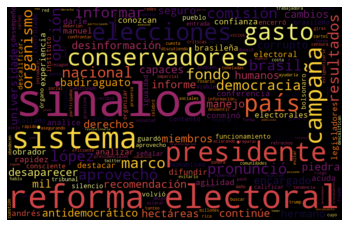

In [15]:
#segundo wordcloud con minúsculas y diferente tamaño

nuevotex=[]
for pal in lispal:
    if not pal in quitar:
        nuevotex.append(pal)

wordcloud = WordCloud(width=1100,height=700, background_color="black",colormap="inferno").generate(" ".join(nuevotex))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

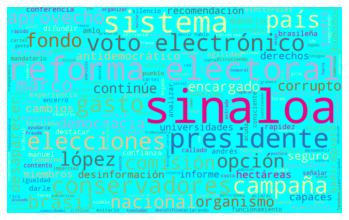

In [17]:
#Tercer wordcloud con otros stopwords y tamaños
otraquitar=["pronunció","mil","informar","resultados"] #asiganamos nuevas stopwords

nuevotex=[]
for pal in lispal:
    if not pal in quitar and not pal in otraquitar:
        nuevotex.append(pal)

wordcloud = WordCloud(width=1300,height=800, background_color="cyan",colormap="Accent").generate(" ".join(nuevotex))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()